In [ ]:
'''
Synthetic data set is from kaggle:
https://www.kaggle.com/datasets/walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning

I've included it in my repository. The kaggle page suggested investigating the relationship between 
Python/DB scores and the other variables included.
'''

In [1]:
import pandas
from matplotlib.pyplot import subplots
from scipy.stats import t

In [2]:
path = "bi.csv"
data = pandas.read_csv(path, encoding='ISO-8859-1')

In [3]:
data.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [4]:
# Checks for any duplicates. There are none.
data.loc[data.duplicated()].shape[0]

0

In [5]:
# Names are irrelavant to the test score variables. So we'll drop these columns.
data = data.drop(columns = ['fNAME', 'lNAME'])

In [6]:
# The Python variable has two null values, but DB score and all other variables
# have no null values. So we'll keep all data rows.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            77 non-null     int64  
 1   gender         77 non-null     object 
 2   country        77 non-null     object 
 3   residence      77 non-null     object 
 4   entryEXAM      77 non-null     int64  
 5   prevEducation  77 non-null     object 
 6   studyHOURS     77 non-null     int64  
 7   Python         75 non-null     float64
 8   DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 5.5+ KB


In [7]:
# There are no blatant issues with numeric variables. The scores are all between 0 and 100,
# and the ages are from 21 to 71.
data.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [8]:
# This function will be used to standardize categorical variables. The item list contains all the version of a 
# category we wish to put together into one label given by the replacement item.
def standardize(data_frame, column_name, item_list, replacement_item):
    data_frame.loc[data_frame[column_name].isin(item_list), column_name] = replacement_item

In [9]:
# Here we see Male, M and male are all present for what we will just call Male. And we have the same problem
# with the Female category.
data.gender.unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [10]:
# We'll use our function to fix this.
standardize(data, 'gender', ['M', 'male'], 'Male')
standardize(data, 'gender', ['F', 'female'], 'Female')

# Now we just have Male and Female.
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
# We found a lowercase norway in our country variable, and Rsa and South Africa are the same country.
data.country.unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [12]:
data.loc[data['country'] == 'norway', 'country'] = 'Norway'
data.loc[data['country'] == 'Rsa', 'country'] = 'South Africa'

data.country.unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Norge', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'UK', 'Somali', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [13]:
# There are multiple version of the BI Residence category in our data set.
data.residence.unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [14]:
standardize(data, 'residence', ['BI-Residence', 'BIResidence', 'BI_Residence'], 'BI Residence')
data.residence.unique()

array(['Private', 'Sognsvann', 'BI Residence'], dtype=object)

In [15]:
# The Diploma, High School and Bachelors category all need to be standardized.
data.prevEducation.unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [16]:
standardize(data, 'prevEducation', ['diploma', 'DIPLOMA', 'Diplomaaa'], 'Diploma')
data.loc[data['prevEducation'] == 'HighSchool', 'prevEducation'] = 'High School'
data.loc[data['prevEducation'] == 'Barrrchelors', 'prevEducation'] = 'Bachelors'

data.prevEducation.unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

In [17]:
# Check to see if standardizing has resulted in any duplicates that couldn't be detected before.
# There are still none.
data.loc[data.duplicated()].shape[0]

0

In [18]:
data.head()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,44,Female,Norway,Private,72,Masters,158,59.0,55
1,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50
3,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
4,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [19]:
# The data set creator suggested investigating which independent variables are related to
# Python/DB scores.

In [20]:
# For the numeric data, we can look at correlations and scatter plots.
data.corr(numeric_only=True)

,Age,entryEXAM,studyHOURS,Python,DB
Age,1.000000,0.131427,0.214712,-0.014608,0.099454
entryEXAM,0.131427,1.000000,0.807851,0.787550,0.608464
studyHOURS,0.214712,0.807851,1.000000,0.813826,0.466043
Python,-0.014608,0.787550,0.813826,1.000000,0.449401
DB,0.099454,0.608464,0.466043,0.449401,1.000000


In [21]:
# We see that entry exam score and study hours have a fairly strong positive correlation
# with Python score. While for DB, the two variables still have a positive correlation, but
# they are not as strong. And age seems to be unrelated with the dependent variables.

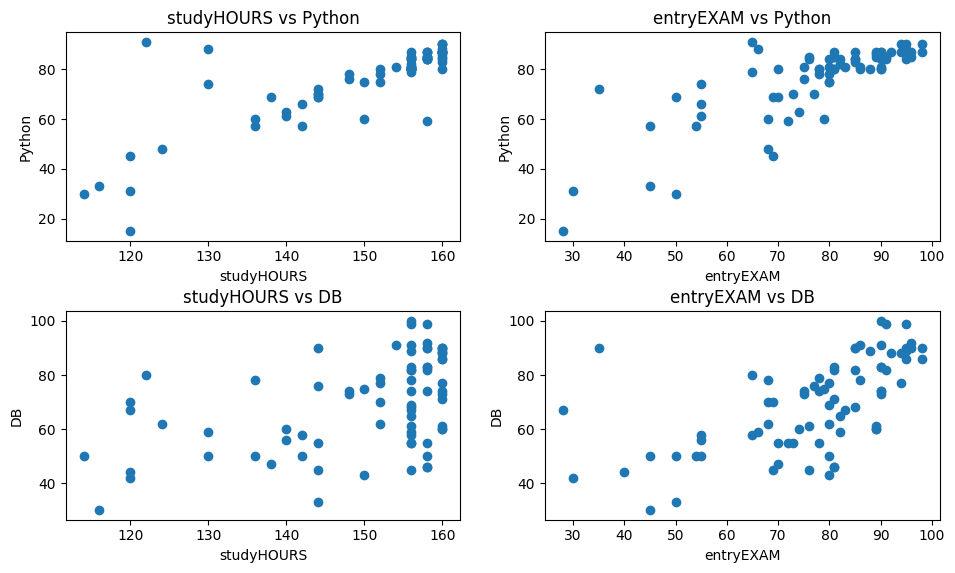

In [22]:
# We'll plot our dependent variables vs entry exam score and study hours.
fig, axes = subplots(2, 2, figsize=(10, 6))
independent_variable = ['Python', 'DB']
dependent_variable = ['studyHOURS', 'entryEXAM']
fig.tight_layout(pad=3.0)
for i in range(2):
    for j in range(2):
        x = dependent_variable[j]
        y = independent_variable[i]
        axes[i][j].scatter(data[x], data[y])
        axes[i][j].set_xlabel(x)
        axes[i][j].set_ylabel(y)
        axes[i][j].set_title(x + ' vs ' + y)

In [23]:
# From the plots, it's clear that the relationship between DB and study hours 
# is weaker than for the other relationships of interest.

In [24]:
# For the categorical variables we can compare means for categories and visualize using bar plots.

In [25]:
# We'll create some functions that we'll use for analysizing the categorical variables.

dependent_variables=['Python', 'DB']

def barplots(categorical_variable):
    global data, dependent_variables
    axis = data[dependent_variables + [categorical_variable]].groupby(categorical_variable).mean().plot.bar()
    axis.set_title('Mean Test Scores')

# This will calculate means and standard errors across categories of the given variable.
def get_statistics(categorical_variable):
    global data, dependent_variables
    return data[dependent_variables + [categorical_variable]].groupby(categorical_variable).agg(['mean', 'sem', 'count'])

# This will calculate a p-value for comparing the means of two categories assuming the categories are independent.
def get_p_value(stats_data_frame, response_variable, category1, category2):
    m1 = stats_data_frame.loc[category1, (response_variable, 'mean')]
    n1 = stats_data_frame.loc[category1, (response_variable, 'count')]
    se1 = stats_data_frame.loc[category1, (response_variable, 'sem')]
    
    m2 = stats_data_frame.loc[category2, (response_variable, 'mean')]
    n2 = stats_data_frame.loc[category2, (response_variable, 'count')]
    se2 = stats_data_frame.loc[category2, (response_variable, 'sem')]
    
    t_value = (m1 - m2) / (se1 ** 2 + se2 ** 2) ** 0.5
    degrees_of_freedom = (se1 ** 2 + se2 ** 2) ** 2 / (se1 ** 4 / (n1 - 1) + se2 ** 4 / (n2 - 1))
    p_value = t(degrees_of_freedom).cdf(-abs(t_value)) * 2
    return round(p_value, 4)

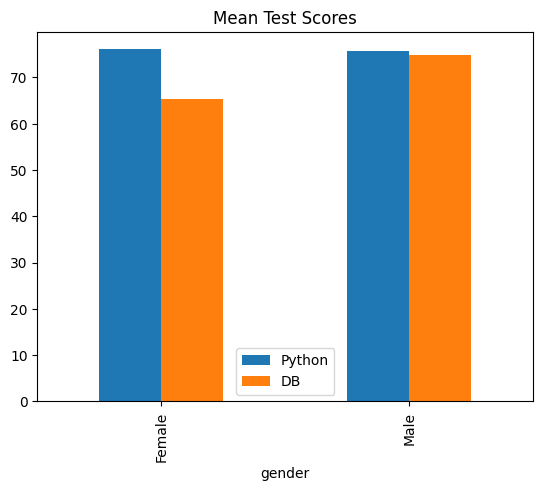

In [26]:
# Gender:
barplots('gender')

In [27]:
gender_stats = get_statistics('gender')
gender_stats

Python                         DB                
             mean       sem count       mean       sem count
gender                                                      
Female  76.000000  2.259835    42  65.279070  2.600223    43
Male    75.666667  2.883031    33  74.764706  2.692188    34

In [28]:
# We can see that men scored around 9.5% higher on average than women in DB, and
# the standard errors (sem) are 2.7% and 2.6% for both men and women respectively. Assuming that male and female 
# scores are independent of each other, we can perform a hypothesis test to see if their means
# are significantly different. This results in a p-value of:

p_value = get_p_value(gender_stats, 'DB', 'Male', 'Female')
print(p_value, end='.')

0.0134.

In [29]:
# And this suggests that male and female mean DB scores are significantly different. While for
# Python scores, men and women seem to do about the same with women leading slightly.

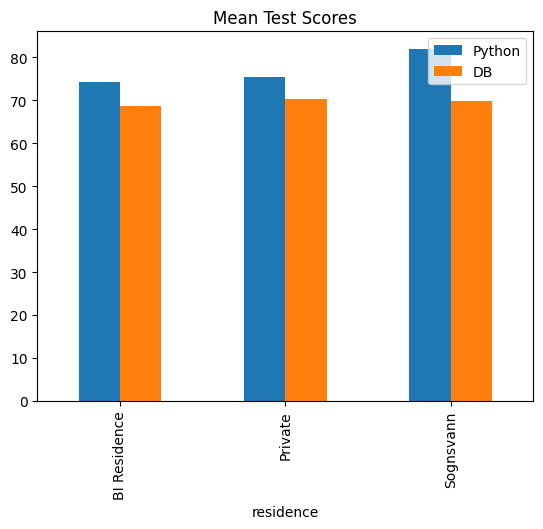

In [30]:
# Residence:
barplots('residence')

In [31]:
residence_stats = get_statistics('residence')
residence_stats

Python                         DB                
                   mean       sem count       mean       sem count
residence                                                         
BI Residence  74.258065  2.955210    31  68.562500  3.301374    32
Private       75.333333  2.829320    33  70.212121  2.762286    33
Sognsvann     81.909091  2.146687    11  69.833333  4.873915    12

In [32]:
# We see not much difference in mean DB scores across residence. While for Python, we find that Sognsvann
# residents scored about 6 to 7 percent higher on average. Assuming independece, the p-values for Songsvann 
# vs Private and BI Residence are:

priv_p_value = get_p_value(residence_stats, 'Python', 'Private', 'Sognsvann')
bi_p_value = get_p_value(residence_stats, 'Python', 'BI Residence', 'Sognsvann')
print('Private:', priv_p_value, '\nBI Residence:', bi_p_value, end='.')

Private: 0.0718 
BI Residence: 0.0429.

In [33]:
# So there is some evidence that Sognsvann residents are performing better than the other two in Python scores. 
# However, the Sognsvann group only has a count of 11 Python scores. Thus it's possible the 
# p-values may not be accurate.

# And there doesn't seem to be a difference between BI Residence and Private for Python scores.

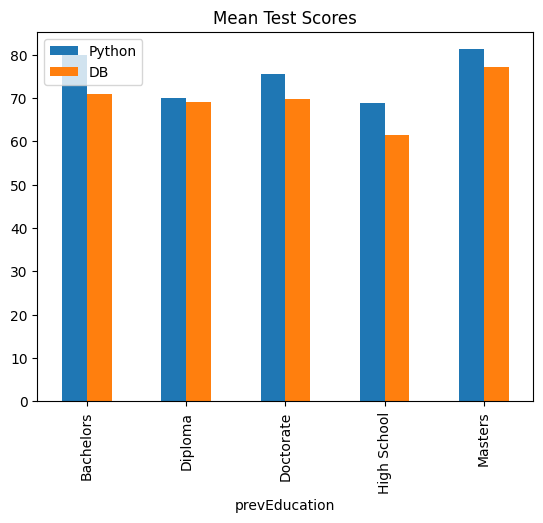

In [34]:
# Education Level:
barplots('prevEducation')

In [35]:
education_stats = get_statistics('prevEducation')
education_stats

Python                          DB                
                    mean        sem count       mean       sem count
prevEducation                                                       
Bachelors      80.000000   1.279323    25  70.880000  3.282946    25
Diploma        70.083333   5.781971    12  69.000000  5.354126    12
Doctorate      75.600000  11.191961     5  69.800000  8.368990     5
High School    68.882353   4.844556    17  61.421053  3.934638    19
Masters        81.187500   2.215887    16  77.062500  3.475472    16

In [37]:
# We find that the Masters level performed the best in both. Assuming independence and ignoring the small
# sample sizes, its p-value when compared to High School level for DB is:

p_value = get_p_value(education_stats, 'DB', 'Masters', 'High School')
print(p_value, end='.')

0.0054.

In [38]:
# So there is evidence education level does have an impact on DB scores. While for Python scores, the p-value
# between Masters and High School levels is:

p_value = get_p_value(education_stats, 'Python', 'Masters', 'High School')
print(p_value)

0.0305


In [39]:
# which has similar implications.

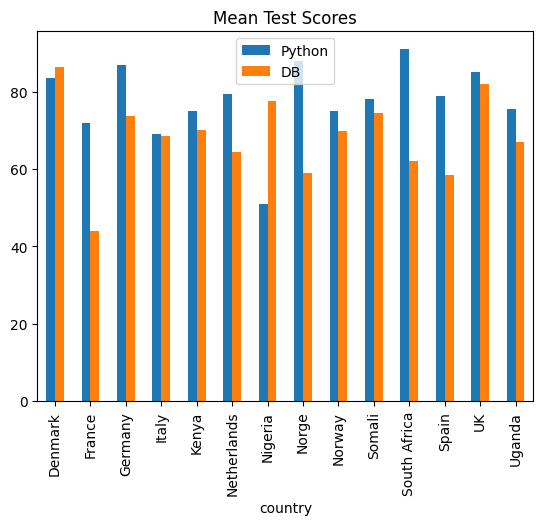

In [40]:
# Country
barplots('country')

In [41]:
get_statistics('country')

Python                          DB                 
                  mean        sem count       mean        sem count
country                                                            
Denmark       83.50000   0.500000     2  86.500000   3.500000     2
France        72.00000   3.000000     2  44.000000   1.000000     2
Germany       87.00000   0.000000     3  73.666667   7.218803     3
Italy         69.00000   6.000000     2  68.500000   8.500000     2
Kenya         75.00000   7.549834     3  70.000000   2.516611     3
Netherlands   79.50000   0.500000     2  64.500000   6.500000     2
Nigeria       51.00000  36.000000     2  77.500000  10.500000     2
Norge         88.00000        NaN     1  59.000000        NaN     1
Norway        75.06383   2.340253    47  69.895833   2.664988    48
Somali        78.00000   6.000000     2  74.500000  15.500000     2
South Africa  91.00000        NaN     1  62.000000  18.000000     2
Spain         79.00000   1.000000     2  58.500000   3.500000     2
UK            85.00000   0.000000     2  82.000000   8.000000     2
Uganda        75.50000   3.570714     4  67.000000   8.897565     4

In [42]:
# We do see differences across countries in mean scores. But since most countries only have a couple of data
# points, it seems unreasonable to try and make inferences from this.

In [43]:
# Overall, it seems that a larger sample size is required. But the data suggests that gender, residence type,
# education level, hours of study and entry exam scores are all related to the dependent variables.